# Example 01: Relaxation experiment

This script provides an example of fitting of a relaxation experiment.
First import the packages.

In [1]:
using RHEOSafm
using RHEOS

using Plots
using Plots.PlotMeasures
gr();

Next, the output file provided by the JPK software is imported. The file contains the time-force-displacement values and they are automatically converted into time-stress-strain.
The function `importJPK` requires the file path, the radious of the indenter, and the segments of the curve to upload (i.g. extend, pause, retract).

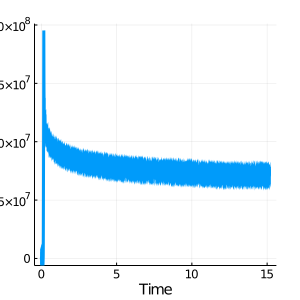

In [2]:
input_file = joinpath(@__DIR__, "assets", "AFM_relaxation.txt")
R = 150e-9; # Radious of the indenter
interface = AFM(R);
data = importJPK(input_file, interface, sections = ["extend", "pause"]);

plot(data.t, data.σ, legend = false, xlabel = "Time", ylabel = "Stress", guidefont= 10, size = (300,300), lw=3, margin=4mm)

To detect the point at which approximately contact occurs using RHEOSafm it is possible to:
1) define a force threshold
2) apply Hertz spherical contact model
In this example the "threshold" method is used. An application of the Hertz method is availabel in example 02.

In [3]:
data_contact = contact_point(data, interface, "threshold", (threshold = 1e-8,));

To speed up the fitting procedure, the data points are downsampled.

In [4]:
d_downsample = resample(data_contact, -20);

The relaxation curve is then fitted using a Fractional Standard Linear Solid model

In [5]:
SLS_model = modelstepfit(d_downsample, FractSLS_Zener, strain_imposed);

┌ Warning: Initial values for model parameters are set to [0.5, 0.5, 0.5, 0.5] by default
└ @ RHEOS /home/runner/.julia/packages/RHEOS/UUrax/src/processing.jl:250
Time: 85.906527082 s, Why: FORCED_STOP, Parameters: [5.686153661719033e8, 0.06605164371451204, 2.2156617386055715e7, -2.055413252180823e7], Error: 2.6725808981282468e16

Now we can extract the strain pattern

In [6]:
SLS_predict = extract(data_contact, strain_only);

and calculate the stress based on the fitted model

In [7]:
SLS_predict = modelpredict(SLS_predict, SLS_model);

Now we can plot data and model together for comparison

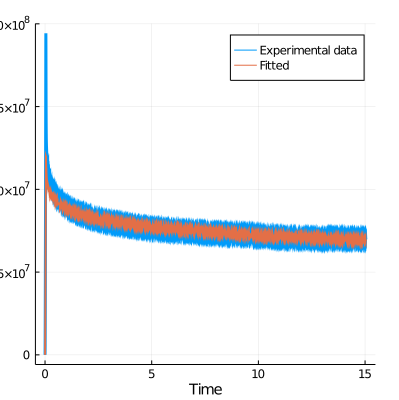

In [8]:
plot(data_contact.t, data_contact.σ, legend = true, xlabel = "Time", ylabel = "Stress", label = "Experimental data", guidefont= 10, size = (500,500), lw=3, margin=4mm)
plot!(SLS_predict.t, SLS_predict.σ, label = "Fitted",guidefont= 10, size = (400,400), lw=2)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*